In [188]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [189]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names) 
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [190]:
df['target'] = pd.Series(data.target)
print(df.head())

dfOriginal = df.copy()

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [191]:
hasNan = df.isnull().sum()
print(hasNan)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


<Axes: title={'center': 'Buscando outliers'}>

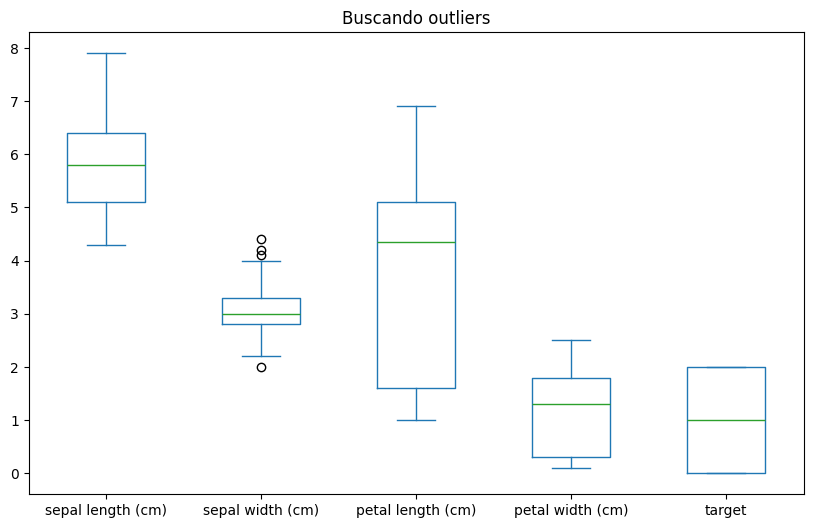

In [192]:
print(df.describe())
df.plot(kind='box', figsize=(10, 6), title="Buscando outliers")

In [193]:
# Para tratar outliers, é possível utilizar o método IQR (Interquartile Range)
# O IQR é a diferença entre o terceiro e o primeiro quartil
# É usado para identificar outliers definindo os limites inferior e superior
# Q1 = df['atributo'].quantile(0.25)
# Q3 = df['atributo'].quantile(0.75)
# IQR = Q3 - Q1
# Limite inferior = Q1 - 1.5 * IQR
# Limite superior = Q3 + 1.5 * IQR

Q1 = df['sepal width (cm)'].quantile(0.25)
Q3 = df['sepal width (cm)'].quantile(0.75)
IQR = Q3 - Q1
lLim = Q1 - 1.5 * IQR
hLim = Q3 + 1.5 * IQR

print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)
print('Limite inferior:', lLim)
print('Limite superior:', hLim)
# print('\nTestando valores menores que o limite inferior:', [df['sepal width (cm)'] < lLim])
print('Quantidade de valores menores que o limite inferior:', (df['sepal width (cm)'] < lLim).sum())

# print('\nTestando valores maiores que o limite superior:', [df['sepal width (cm)'] > hLim])
print('Quantidade de valores maiores que o limite superior:', (df['sepal width (cm)'] > hLim).sum())

# print(df['sepal width (cm)'])

Q1: 2.8
Q3: 3.3
IQR: 0.5
Limite inferior: 2.05
Limite superior: 4.05
Quantidade de valores menores que o limite inferior: 1
Quantidade de valores maiores que o limite superior: 3


In [194]:
df.loc[df['sepal width (cm)'] < lLim, 'sepal width (cm)'] = lLim
df.loc[df['sepal width (cm)'] > hLim, 'sepal width (cm)'] = hLim


print('Quantidade de valores menores que o limite inferior:', (df['sepal width (cm)'] < lLim).sum())
print('Quantidade de valores maiores que o limite superior:', (df['sepal width (cm)'] > hLim).sum())

Quantidade de valores menores que o limite inferior: 0
Quantidade de valores maiores que o limite superior: 0


<Axes: title={'center': 'Box plot Sepal Length'}>

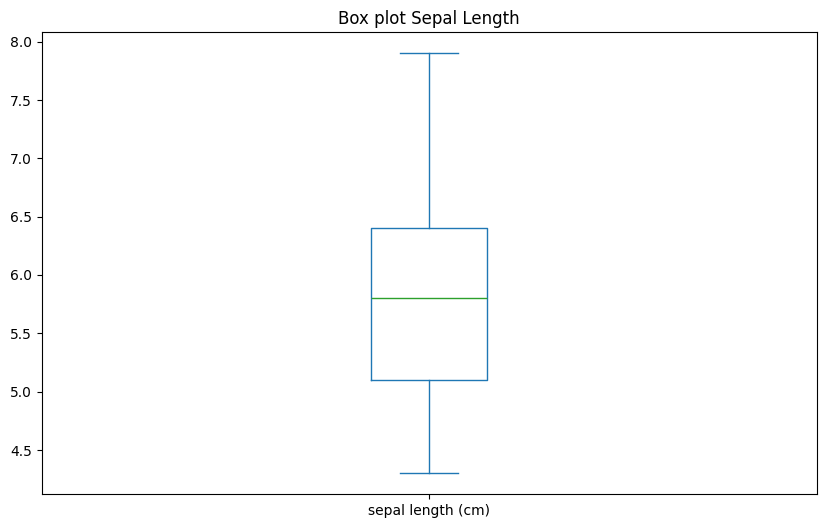

In [195]:
df['sepal length (cm)'].plot(kind='box', figsize=(10, 6), title="Box plot Sepal Length")

                   petal length (cm)  petal width (cm)    target
petal length (cm)           1.000000          0.962865  0.949035
petal width (cm)            0.962865          1.000000  0.956547
target                      0.949035          0.956547  1.000000

                    sepal length (cm)  sepal width (cm)    target
sepal length (cm)           1.000000         -0.118719  0.782561
sepal width (cm)           -0.118719          1.000000 -0.426572
target                      0.782561         -0.426572  1.000000


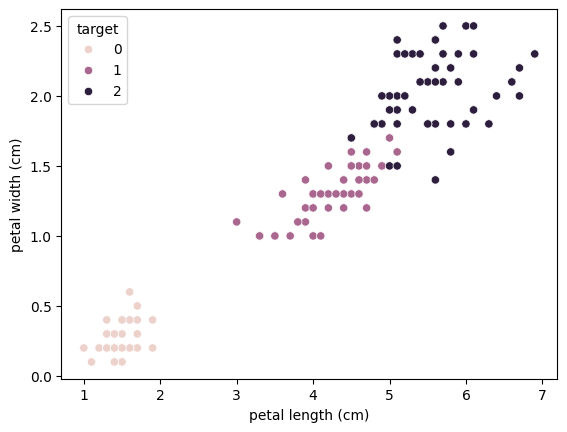

In [196]:
# pd.concat([df.loc[0:10], df.loc[50:60], df.loc[100:110]])

print(df.drop(["sepal length (cm)","sepal width (cm)"],axis='columns').corr())
print('\n',df.drop(["petal length (cm)","petal width (cm)"],axis='columns').corr())

# sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)",hue='target')
# plt.show()
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)",hue='target')
plt.show()
# sns.scatterplot(data=df, x="petal length (cm)", y="sepal length (cm)",hue='target')

# plt.show()
# sns.scatterplot(data=df, x="sepal length (cm)", y="petal length (cm)",hue='target')
# plt.show()
# sns.scatterplot(data=df, x="petal length (cm)", y="sepal width (cm)",hue='target')
# plt.show()
# sns.scatterplot(data=df, x="petal width (cm)", y="sepal length (cm)",hue='target')
# plt.show()
# sns.scatterplot(data=df, x="petal width (cm)", y="sepal width (cm)",hue='target')


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222             0.725           0.067797          0.041667   
1           0.166667             0.475           0.067797          0.041667   
2           0.111111             0.575           0.050847          0.041667   
3           0.083333             0.525           0.084746          0.041667   
4           0.194444             0.775           0.067797          0.041667   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


<Axes: >

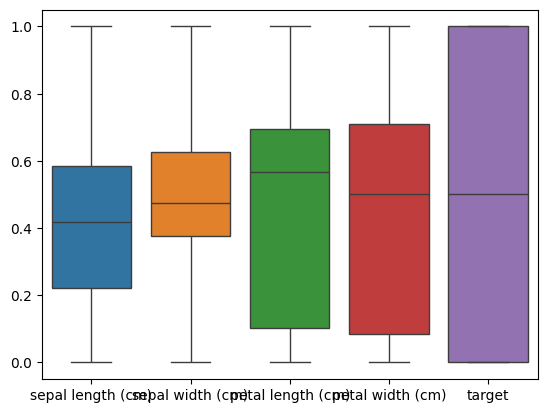

In [197]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df.head())
sns.boxplot(data=df)

<Axes: >

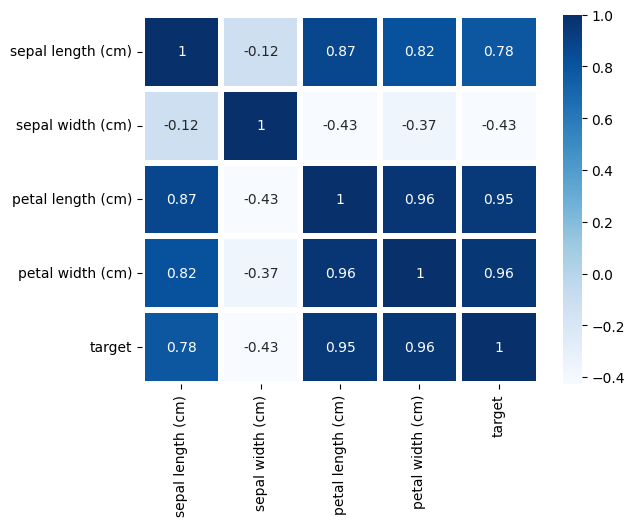

In [198]:
df['target'].value_counts()

sns.heatmap(df.corr(), annot=True, linewidth=3.0, cmap="Blues")

In [207]:
from sklearn.model_selection import KFold
from sklearn import metrics
from collections import Counter

def knn(k, X, y):
    validacao_cruzada = KFold(n_splits=15, shuffle=True) ##, random_state=77)
    acuracias = []
    for train_index, test_index in validacao_cruzada.split(X):
        # for index in test_index:
        #     print(index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        y_pred = [knn_predict(X_train, y_train, x_test, k) for x_test in X_test]
        
        acuracia = np.mean(y_pred == y_test)
        acuracias.append(acuracia)
    return np.mean(acuracias)

def knn_predict(X_train, y_train, x_test, k):
    distancias = [dis_euclidiana(x_test, x_train) for x_train in X_train]
    k_indices = np.argsort(distancias)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    semelhante = Counter(k_nearest_labels).most_common(1)
    return semelhante[0][0]

def dis_euclidiana(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [208]:
acuracia = knn(3, df.drop('target', axis='columns').values, df['target'].values)

print('Acurácia:', acuracia)

Acurácia: 0.9533333333333334


[[1, 0.9466666666666668], [2, 0.9333333333333335], [3, 0.9533333333333334], [4, 0.9533333333333334], [5, 0.9466666666666668], [6, 0.9533333333333334], [7, 0.9533333333333334], [8, 0.9600000000000001], [9, 0.9533333333333334], [10, 0.9466666666666668], [11, 0.9600000000000002], [12, 0.9600000000000001], [13, 0.9600000000000001], [14, 0.9666666666666668], [15, 0.9666666666666667], [16, 0.9666666666666667], [17, 0.9666666666666667], [18, 0.9600000000000001], [19, 0.9533333333333334], [20, 0.9533333333333334], [21, 0.9533333333333334], [22, 0.9533333333333334], [23, 0.9533333333333335], [24, 0.9533333333333334], [25, 0.9466666666666668], [26, 0.9533333333333334], [27, 0.9466666666666668], [28, 0.9533333333333334], [29, 0.9400000000000001], [30, 0.9533333333333334], [31, 0.9533333333333334], [32, 0.9600000000000002], [33, 0.9533333333333334], [34, 0.9666666666666668], [35, 0.9600000000000001], [36, 0.9533333333333335], [37, 0.9533333333333334], [38, 0.9400000000000001], [39, 0.9533333333333

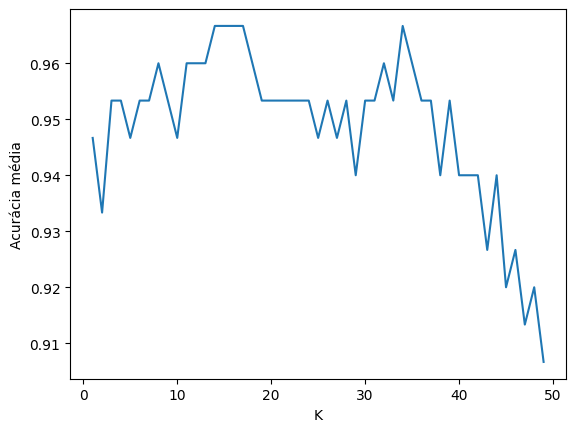

In [209]:
ponto_k = []
for k in range(1, 50, 2):
    acuracia = knn(k, df.drop('target', axis='columns').values, df['target'].values)
    ponto_k.append([k, acuracia])

print(ponto_k)
plt.plot([ponto[0] for ponto in ponto_k], [ponto[1] for ponto in ponto_k])
plt.ylabel('Acurácia média')
plt.xlabel('K')
plt.show()
